In [1]:
# -*- coding: UTF-8 -*-
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#前期数据可视化部分分析

In [2]:
# prepare data
test_set = pd.read_csv('raw/TestSet.csv')
test_subset = pd.read_csv('raw/TestSubset.csv')
train_set = pd.read_csv('raw/TrainingSet.csv')
train_subset = pd.read_csv('raw/TrainingSubset.csv')

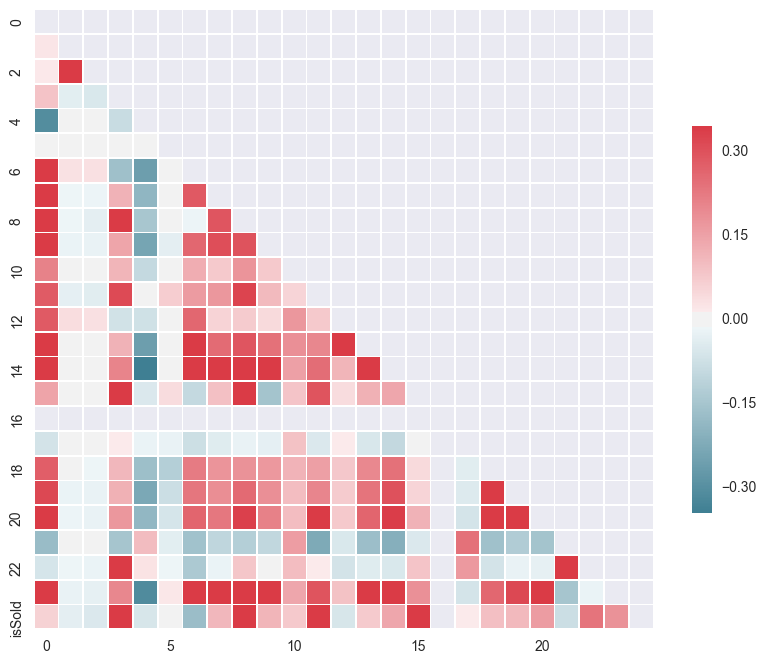

In [3]:
#EbayID,SellerName,EndDay 和拍卖结果没多大影响,故去掉
train = train_set.drop(['EbayID', 'QuantitySold', 'SellerName', 'EndDay'], axis=1)
train_target = train_set['QuantitySold']
j, n_features = train.shape
df = DataFrame(np.hstack((train, train_target[:, None])), columns=range(n_features) + ["isSold"])
#计算相关性矩阵
c = df.corr()
f, ax = plt.subplots(figsize=(10, 10))

#输出下三角部分
mask = np.zeros_like(c, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 产生热图中的对应变化颜色
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#调用 seanborn 产生热图
sns.heatmap(c, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

sns.plt.show()